# Introduction

Formula 1 is a highly competitive international racing competition. The driver who completes the predetermined number of laps on the racetrack first wins. Drivers compete in races throughout the year with the intention of earning the most amount of points. Drivers earn points for the position in which they finish. The world champion is the driver who earns the most points after all the races of the year are over. Teams compete in pairs and the combined scores of the pairs denote the rank of the team. The pair with the most points wins the Constructors Championship.

We will explore which countries produce the best drivers. This information may guide teams to narrow their search to certain countries to find the best drivers, resulting in more wins and points.

We found the criteria for the best drivers to be the amount of wins, number of points, and fastest lap time. To find which countries produce the best drivers, we will use several datasets containing driver Ids, nationality, wins, points, overall time, and fastest lap times. After merging the variables into one dataset, we will create visualizations displaying which countries have drivers with the fastest lap times, most wins, and most points. We found that Finish drivers have the fastest lap times and British drivers have the highest driver standing and overall points. The country with the most wins per driver is New Zealand.


# Data Description

Data Description: We obtained data from the drivers.csv, results.csv, driver_standings.csv, and sprint_results.csv datasets. In the drivers dataset, each row represents an F1 driver. There are 857 observations revealing the driver Id, name, date of birth, nationality, and links to more information about the driver. The results dataset has 25840 observations following the results of each race. The dataset contains the race Id, driver Id, points earned, overall time, and fastest lap time. The driver standings dataset has 33902 observations of drivers and their corresponding driver Id, points, wins, driver standings Id, and position. The sprint results dataset has 120 observations of drivers. This dataset contains data on the fastest lap times in addition to driver Id, result Id, points, and status Id.

- Merging Procedures:
We merged the four datasets using the driver ID as the key variable. We used the left join method to keep all rows from the 'drivers' dataset and only matching rows from the other three datasets. This way, we resulted in a table, below as df3, which contained only the driverId, nationality, wins, points, fastest results lap time, and fastest sprint lap time.

- Data Cleaning Procedures:
We first reaplaced all //N values with NaN values so that we could perform calculations. We then subsetted the four datasets to only include necessary columns and removed duplicate results. We also renamed the 'fastestLapTime' column in the 'results' and 'sprint_results' datasets to avoid any confusion during merging. Finally, we aggregated the data in df3 by nationality to produce a dataframe with the sum of points, wins, and drivers, along with the fastest results and sprint lap times, all by nationality.

- Main Columns:
After merging, we created a new dataset that grouped the merged dataset by nationality and calculated various statistics. We were interested in the 'points', 'wins', 'num_drivers', 'results_fastestLapTime', and 'sprint_fastestLapTime' columns. We computed a table of descriptive statistics for these columns to gain insights into the trends and patterns within the data.






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from   matplotlib import style
from   matplotlib import ticker
import matplotlib.dates as mdates

In [ ]:
drivers = pd.read_csv(r"\data_raw\drivers.csv")
results = pd.read_csv(r"\data_raw\results.csv")
driver_standings = pd.read_csv(r"\driver_standings.csv")
sprint_results = pd.read_csv(r"\sprint_results.csv")

# Data Cleaning & Merging

In [ ]:
print(len(drivers))
print(len(results))
print(len(driver_standings))
print(len(sprint_results))

857
25840
33902
120


In [ ]:
drivers_columns = drivers.columns
results_columns = results.columns
driver_standings_columns = driver_standings.columns
sprint_results_columns = sprint_results.columns

display(drivers_columns)
display(results_columns)
display(driver_standings_columns)
display(sprint_results_columns)

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

Index(['driverStandingsId', 'raceId', 'driverId', 'points', 'position',
       'positionText', 'wins'],
      dtype='object')

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'fastestLapTime', 'statusId'],
      dtype='object')

In [ ]:
# Clean and merge the datasets

drivers = drivers.replace("\\N", np.nan)
results = results.replace("\\N", np.nan)
driver_standings = driver_standings.replace("\\N", np.nan)
sprint_results = sprint_results.replace("\\N", np.nan)

# Rename fastestLapTime columns in results and sprint_results
results = results.rename(columns={"fastestLapTime": "results_fastestLapTime"})
sprint_results = sprint_results.rename(columns={"fastestLapTime": "sprint_fastestLapTime"})


# Subset certain columns and remove duplicate results from each of the datasets
drivers_subset = (drivers[['driverId', 'nationality']]
                  .drop_duplicates(subset=['driverId']))
results_subset = (results[['driverId', 'points', 'results_fastestLapTime']]
                  .drop_duplicates(subset=['driverId']))
driver_standings_subset = (driver_standings[['driverId', 'wins']]
                           .drop_duplicates(subset=['driverId']))
sprint_results_subset = (sprint_results[['driverId','sprint_fastestLapTime']]
                         .drop_duplicates(subset=['driverId']))

# Merge the datasets
df1 = pd.merge(drivers_subset, 
               driver_standings_subset,
               on='driverId',
               how = 'left')

df2 = pd.merge(df1,
               results_subset,
               on=[ 'driverId'],
               how = 'left')

df3 = pd.merge(df2, 
               sprint_results_subset, 
               on=[ 'driverId'], 
               how = 'left')

df4 = (df3.groupby('nationality')
       .agg(points_sum = ('points', 'sum'),
            wins_sum = ('wins', 'sum'),
            num_drivers = ('driverId', 'count'),
            results_fastestLapTime = ('results_fastestLapTime', 'first'),
            sprint_fastestLapTime = ('sprint_fastestLapTime', 'first')
))
df4

#NOTES --- Sort table by points

,points_sum,wins_sum,num_drivers,results_fastestLapTime,sprint_fastestLapTime
nationality,,,,,
American,58.00,3.0,158,1:28.953,None
American-Italian,0.00,0.0,1,None,None
Argentine,17.00,0.0,24,None,None
Argentine-Italian,0.00,0.0,1,None,None
Australian,9.00,1.0,18,1:40.910,1:30.640
Austrian,4.00,0.0,15,1:28.303,None
Belgian,11.00,0.0,23,1:34.523,None
Brazilian,25.50,1.0,32,1:31.384,None
British,60.00,3.0,165,1:27.452,1:29.937


# Summary Statistics

- Below is a table displaying what stats typically look like for the usual driver in terms of points and wins

In [ ]:
df3[['points', 'wins']].agg(['mean','max','std','min','count'])

,points,wins
mean,0.393953,0.012941
max,18.000000,1.000000
std,1.491319,0.113087
min,0.000000,0.000000
count,855.000000,850.000000


- Clearly, it's very hard for a driver to get points, and no driver has gotten more than 1 win. 

### General Table
- Below is a general table with the different stats we will be using to discern which nationality produces the best drivers

In [ ]:
df4 = df4.sort_values('points_sum', ascending = False)
df4[['points_sum','wins_sum','num_drivers','results_fastestLapTime','sprint_fastestLapTime']].head(20)

,points_sum,wins_sum,num_drivers,results_fastestLapTime,sprint_fastestLapTime
nationality,,,,,
British,60.00,3.0,165,1:27.452,1:29.937
American,58.00,3.0,158,1:28.953,None
German,30.00,0.0,50,1:27.739,1:31.687
French,27.00,1.0,73,1:29.534,1:32.072
Italian,26.33,1.0,99,1:29.310,1:32.457
Brazilian,25.50,1.0,32,1:31.384,None
Danish,18.00,0.0,5,1:33.066,1:20.557
Belgian,11.00,0.0,23,1:34.523,None
Spanish,10.00,0.0,15,1:28.603,1:31.773


# Graphs

### Fastest Lap Time across Different Nationalities Analysis

The graph below shows the lap time across each nationality. Looking at the different nationalities, Finnish people seem to hold the fastest lap time with 87.418 seconds, while Russians have the "slowest" of the fastest lap times by nationality. However, many of the nationalities have a similar lap times. For example the fastest lap time for British drivers is only 0.034 seconds off from the Finnish drivers.

30


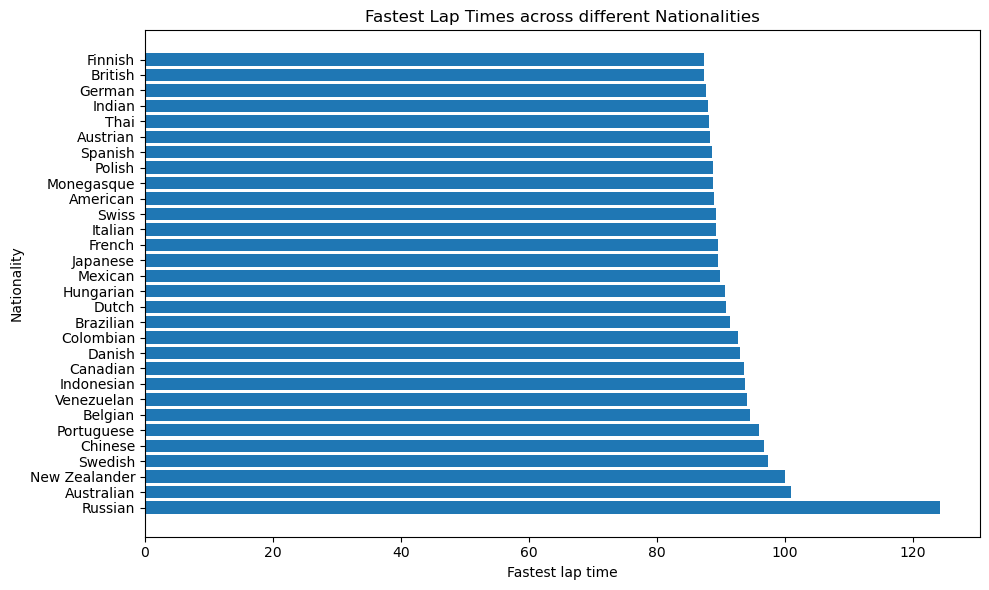

In [ ]:
df4['result_time'] = pd.to_datetime(df4['results_fastestLapTime'], format='%M:%S.%f').dt.time
df4['result_seconds'] = pd.to_timedelta(df4['result_time'].astype(str)).dt.total_seconds().astype(float)
df4.dropna(subset=['result_seconds'], inplace=True)
print(df4['result_seconds'].nunique())
min_df = df4.groupby('nationality')['result_seconds'].min().reset_index()

# sort the dataframe by result_seconds
min_df = min_df.sort_values('result_seconds', ascending = False)

# plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(min_df['nationality'], min_df['result_seconds'])
ax.set_xlabel('Fastest lap time')
ax.set_ylabel('Nationality')
ax.set_title('Fastest Lap Times across different Nationalities')
plt.show()


### Table of Wins Per Driver
- The below chart shows the top 10 nationalities for wins per driver. It is clear that nationalities with more drivers will obtain more wins, but it would be valuable to see which countries get the most wins per driver. Through this table we see that New Zealanders by far and away have the most wins per driver. This is followed by Australians, Brazilians, and Americans.

- For each driver from New Zealand they get more wins on average than any other driver in the league. Australians, and Brazilians also seem to demonstrate a higher amount of wins per driver than most. We should keep this in mind when determining which nationalities produce the best drivers.

In [ ]:
df4['wins_per_driver'] = df4['wins_sum'] / df4['num_drivers']

df4[[ 'wins_per_driver']].head(10)


,wins_per_driver
nationality,
New Zealander,0.111111
Australian,0.055556
Brazilian,0.031250
American,0.018987
British,0.018182
French,0.013699
Italian,0.010101
Colombian,0.000000
Austrian,0.000000


### Points

### Points Per Driver By Nationality
- May be the most important graph, how many points each driver in a certain nationality on average gets.
- Clearly the Danish get the most points by far, having 18 points for only 5 drivers is very impressive 
- Additionally, Colombian seems to get the second most points per driver.
- Interestingly, New Zealanders are on the top 3 for this list, while they were also the top nationality for wins per driver. Clearly New Zealand is a small team but has very skilled drivers

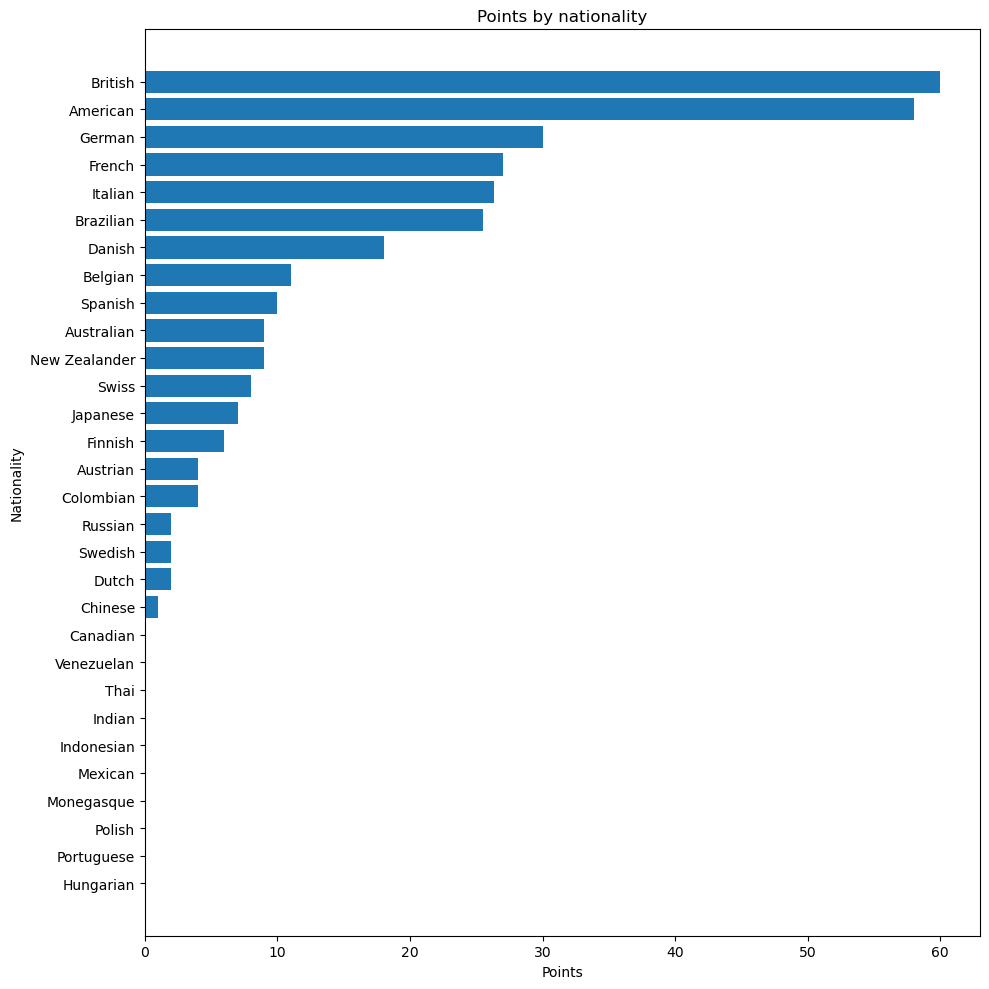

In [ ]:

min_df = df4.groupby('nationality')['points_sum'].min().reset_index()
df4.dropna(subset=['points_sum'], inplace=True)
min_df = min_df.sort_values('points_sum')

# plot the bar chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(min_df['nationality'], min_df['points_sum'])
ax.set_xlabel('Points')
ax.set_ylabel('Nationality')
ax.set_title('Points by nationality')
plt.show()

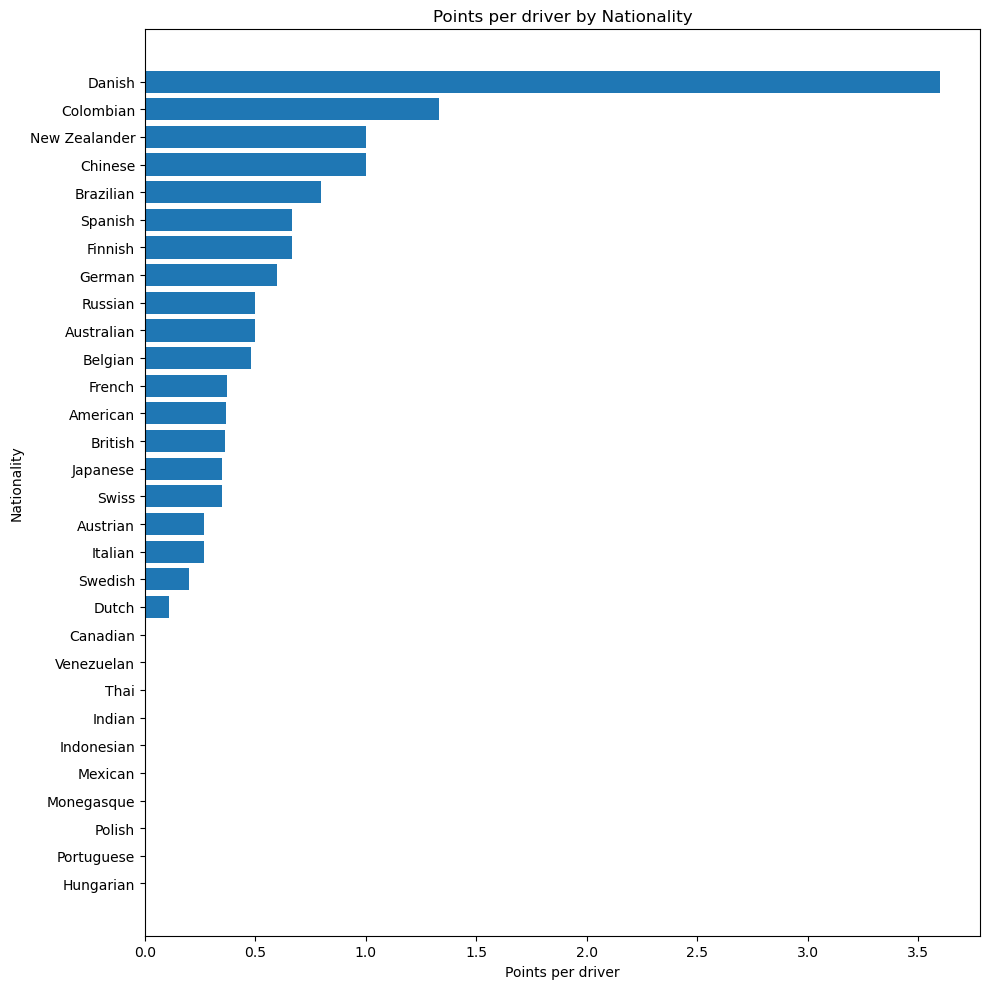

In [ ]:
df4['points_per_driver'] = df4['points_sum'] / df4['num_drivers']

min_df = df4.groupby('nationality')['points_per_driver'].min().reset_index()
df4.dropna(subset=['points_per_driver'], inplace=True)
min_df = min_df.sort_values('points_per_driver')

# plot the bar chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(min_df['nationality'], min_df['points_per_driver'])
ax.set_xlabel('Points per driver')
ax.set_ylabel('Nationality')
ax.set_title('Points per driver by Nationality')
plt.show()

## Stacked Points By nationality with Wins Chart
- This chart shows the number of points per nationality along with the wins they get in the legend.
- Clearly the British and American teams are the most robust, with the highest amount of points and wins by far.
- Notably, those with one win seem to have a lot of commonality with the most wins per driver such as New Zealand, Brazil, and Australia. This makes it clear that there are some nationalities with less drivers, but they are still powerful. 

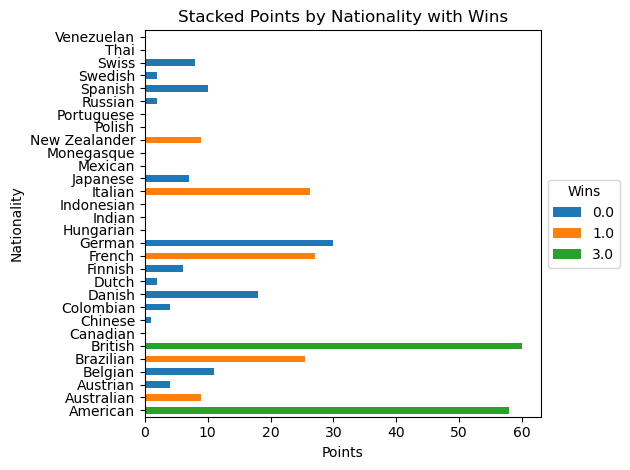

In [ ]:
grouped_sum  = df4.groupby(['nationality','wins_sum'])["points_sum"].sum()

grouped_sum.unstack("wins_sum").plot(kind = "barh",stacked = True)
plt.title("Stacked Points by Nationality with Wins")
plt.xlabel("Points")
plt.ylabel("Nationality")
plt.legend(title='Wins',
           bbox_to_anchor=(1, 0.5),
           loc='center left',)

# **Bar Graph for Fastest Lap Time across different Nationalities for Sprint Race**


*   This bar graph shows that Danish, Thai, Polish drivers have the faster lap time for sprint race. 
*  British drivers, who are second fastest in terms of general lap time, now placed fourth, still make them competitive in terms of speed.
*   Finnish drivers, who come first for faster lap time, now placed 11th for sprint race


In [ ]:
df4 = (df3.groupby('nationality')
       .agg(points_sum = ('points', 'sum'),
            wins_sum = ('wins', 'sum'),
            num_drivers = ('driverId', 'count'),
            results_fastestLapTime = ('results_fastestLapTime', 'first'),
            sprint_fastestLapTime = ('sprint_fastestLapTime', 'first')
)      .reset_index()
)
df4['sprint_time'] = pd.to_datetime(df4['sprint_fastestLapTime'], format='%M:%S.%f').dt.time
df4['sprint_seconds'] = pd.to_timedelta(df4['sprint_time'].astype(str)).dt.total_seconds().astype(float)
df4.dropna(subset=['sprint_seconds'], inplace=True)
print(df4['sprint_seconds'].nunique())
print(df4['nationality'].nunique())
min_df1 = df4.groupby('nationality')['sprint_seconds'].min().reset_index()

# sort the dataframe by result_seconds
min_df1 = min_df1.sort_values('sprint_seconds',ascending=False)

# plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(min_df1['nationality'], min_df1['sprint_seconds'])
ax.set_xlabel('Fastest Lap Time within the Players of the same nationality for Sprint Race (seconds)')
ax.set_ylabel('Nationality')
ax.set_title('Fastest Lap Time across different Nationalities for Sprint Race')
plt.show()

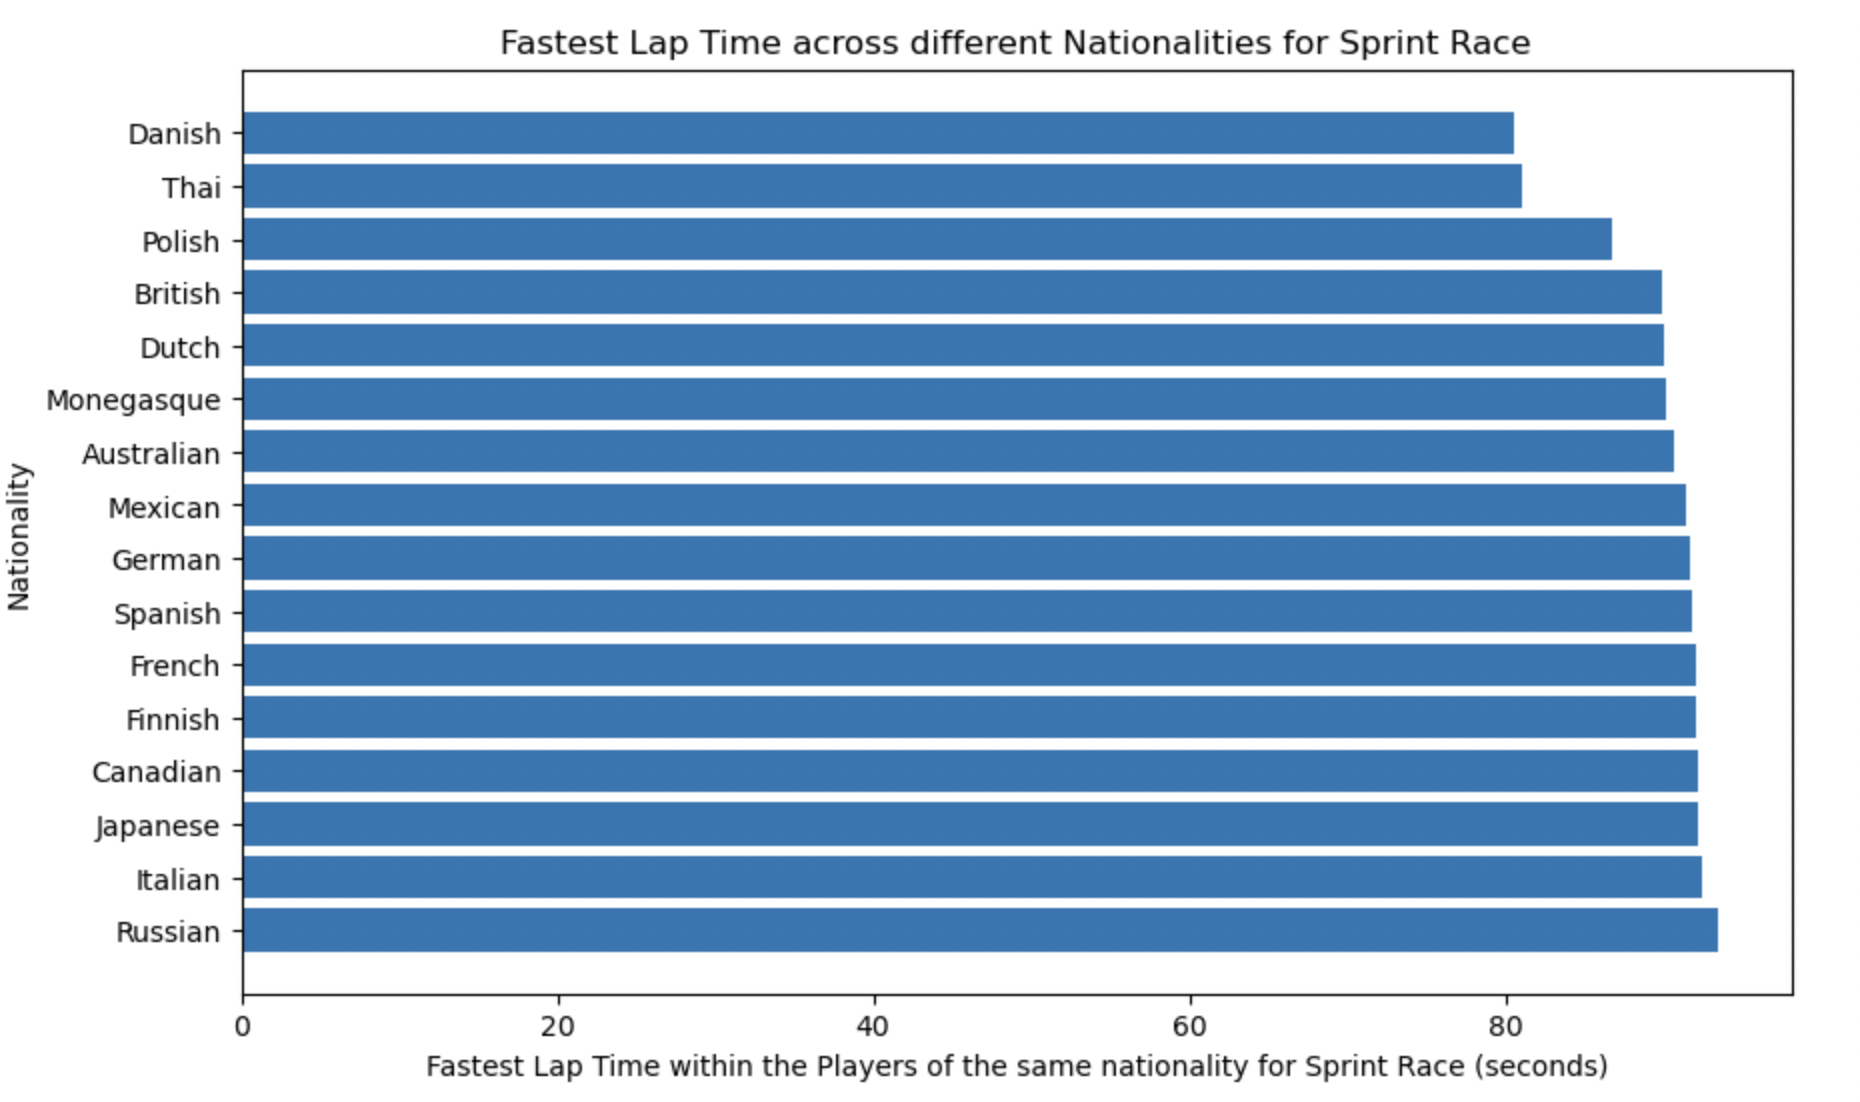

# **Highest Driver Standing Across Different Countries**


*   This Graph shows the the highest standing of the drivers within a country
*   The countries with the highest ranked drivers are: the UK (best driver in the UK ranked 1st in the world),Germany (best driver ranked 2nd in the world),Spain (best driver ranked 4th in the world).
:





In [ ]:
driver_standings_subset=(driver_standings[['driverId','position']].drop_duplicates(subset=['driverId']))
df5=pd.merge(drivers_subset,driver_standings_subset,on='driverId',how='left')
df6=(df5.groupby('nationality')
    .agg(position_highest=('position','first'))
    .reset_index()
)
df6
min_df2 = df6.groupby('nationality')['position_highest'].min().reset_index()

# sort the dataframe by result_seconds
min_df2 = min_df2.sort_values('position_highest',ascending=False)
min_df2
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(min_df2['nationality'], min_df2['position_highest'])
ax.set_xlabel('Nationality')
ax.set_ylabel('Driver Standing')
ax.xaxis.set_tick_params(rotation=75)
plt.gca().invert_yaxis() 
plt.ylim(50, 0) 
ax.set_title('Highest Driver Standing across different Countries ')
for i, row in min_df2.iterrows():
    ax.annotate(row['position_highest'], xy=(row['nationality'], row['position_highest']), ha='center', va='bottom', fontsize=6)

plt.show()

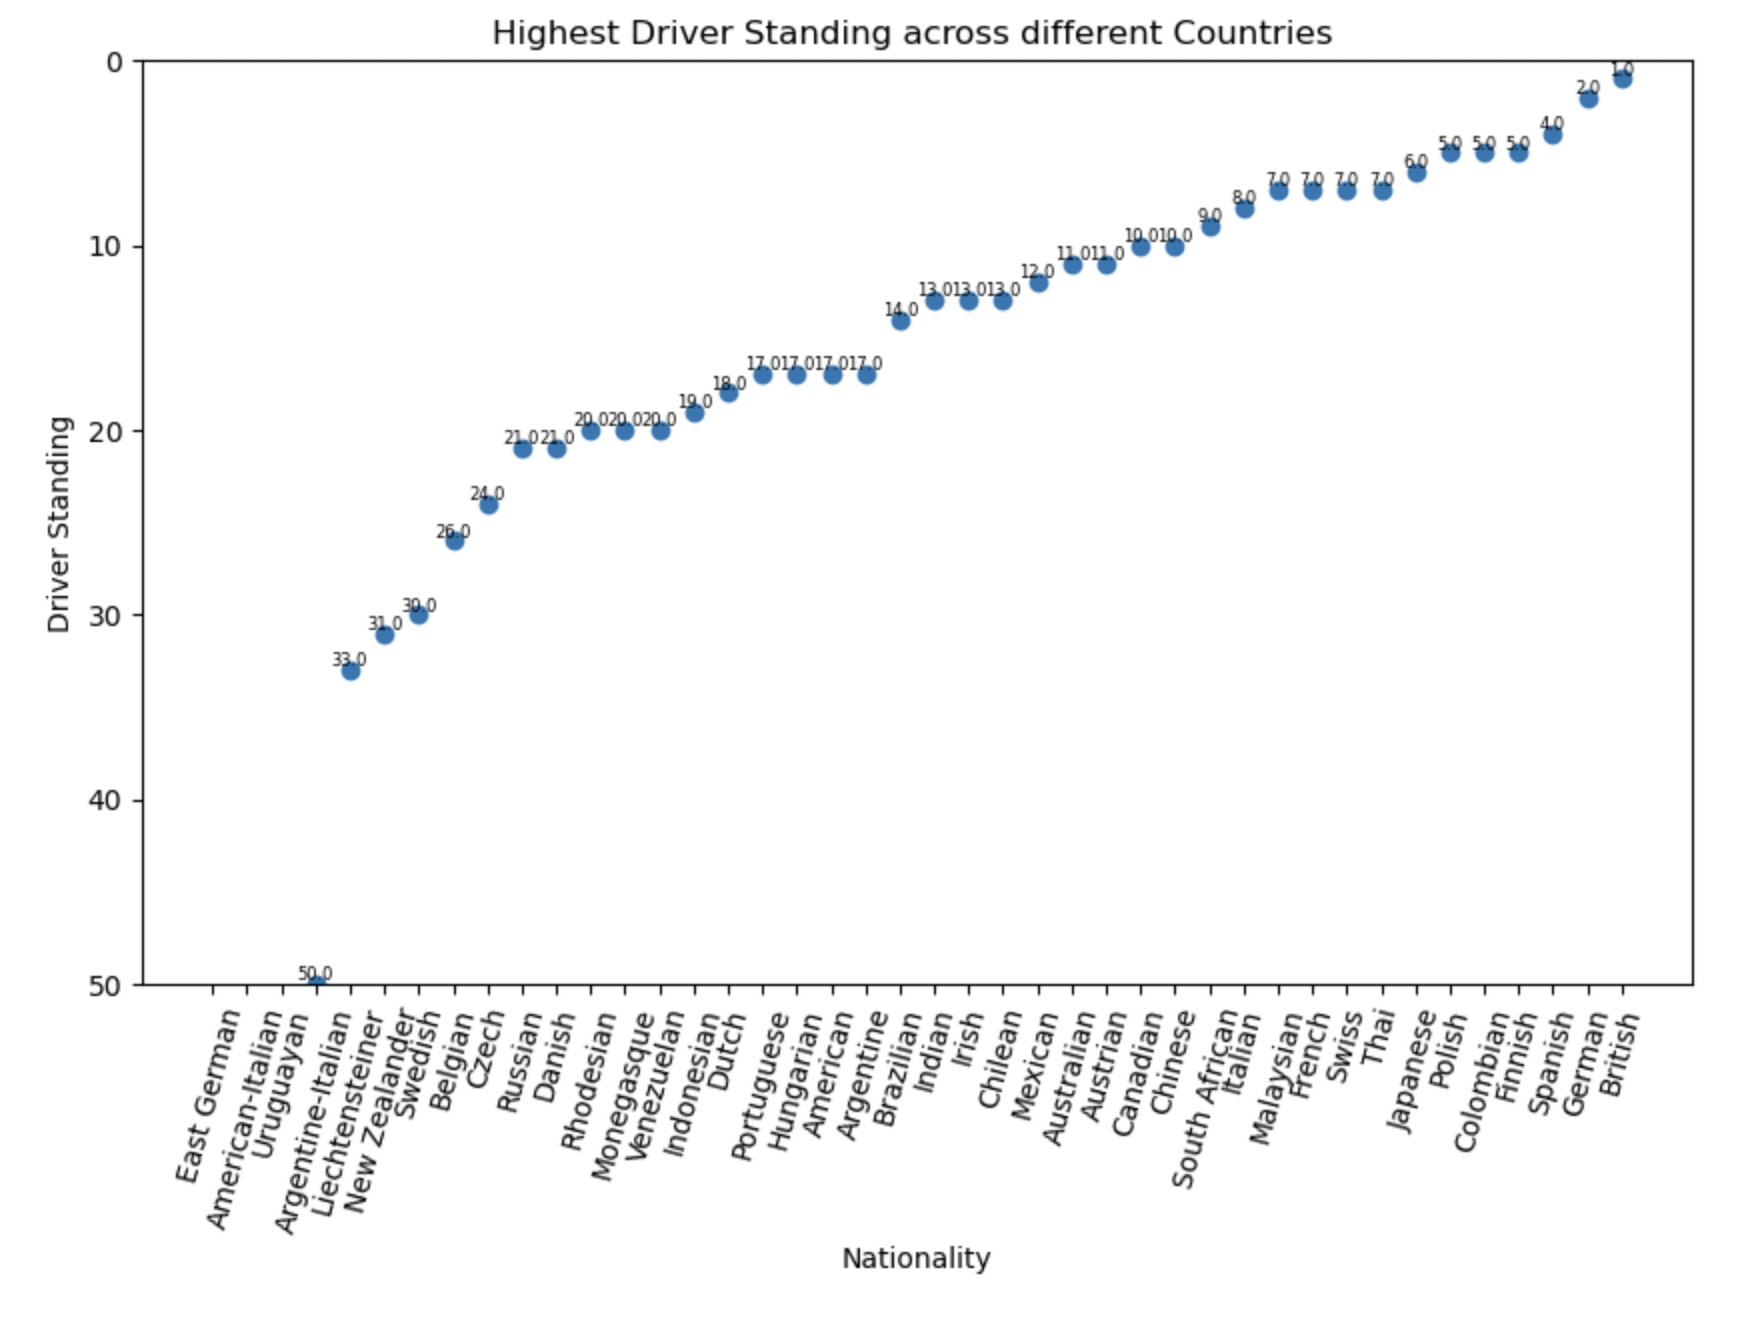

## **Proportion of Players ranked Top 20 in a Country**


*   This graph shows the proportion of drivers that ever ranked Top20 among all the drivers in a country
*   Countries like Poland, Thailand, Mexico, and Finnland has a relative high proportio of drivers that ranked Top20 among all the drivers in the country, indicating that a large proportion of the drivers within the country has apiculate ability, implying that these country may have strong power in cultivating the best drivers in the world.



In [ ]:
subset_df5 = df5[(df5['position'] < 20)]
subset_df5
df7=pd.merge(subset_df5,
             df4,
             on=['nationality'],
             how='left')
df8=(df7.groupby('nationality')
     .agg(rank_sum=('nationality',len),
          drivernum=('num_drivers','mean'))
     .reset_index())
df8['rank_prop']=df8['rank_sum']/df8['drivernum']
df8['rank_prop'].dropna()
df8.dropna(subset=['rank_prop'], inplace=True)

ranked_df8 = df8.sort_values('rank_prop',ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(ranked_df8['nationality'], ranked_df8['rank_prop'])
ax.set_title('Proportion of Drivers Ranked Top20 in a Country')
ax.set_xlabel('Nationality')
ax.set_ylabel('Proportion')
ax.xaxis.set_tick_params(rotation=75)

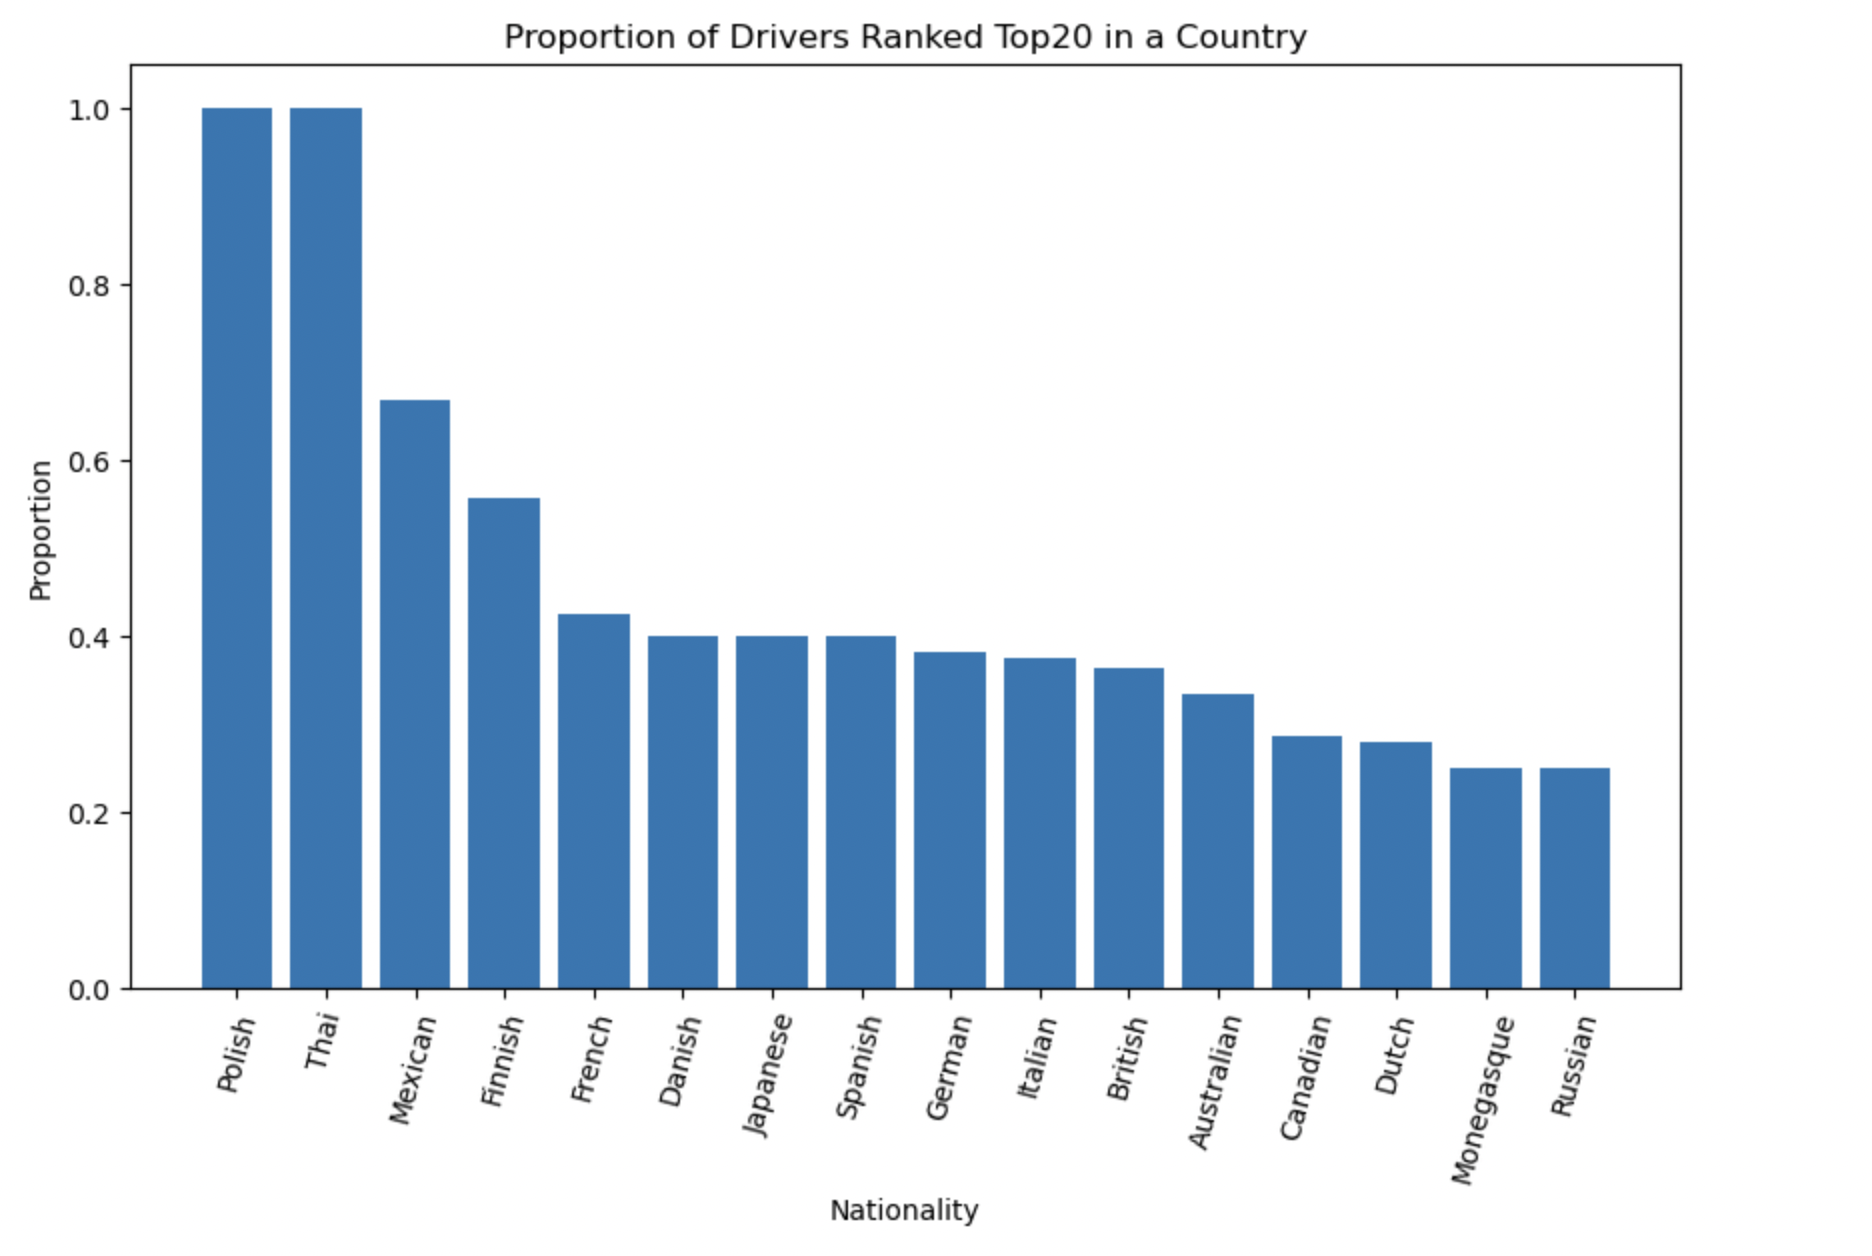

# **Highest Driver Standing Across Different Countries**

Over this process we have analyzed the drivers in Formula 1 of different nationalities through many different lenses. Clearly, the nationalities that dominate Formula 1 are British and American, they have by far the most points, most drivers, and wins. However, there are many nationalities which have small but powerful teams. For example, in our graph of points per driver by nationality, we find that Danish, Colombian, and New Zealanders get the most points per driver. This shows that even though Americans and Brits have many drivers that accrue a lot of points, for  New Zealand, Columbia, and Denmark each driver of those respective nationalities accrue more points. We see this on wins per driver as well with New Zealand, Australia, and Brazil being at the top. Looking at fastest lap times we also have interesting findings. The fastest lap times are held by nationalities with small teams, such as Danes for fastest lap time in the sprint race, and Finns for fastest lap time for non sprint race. Predicatably, Brits also dominate the top ranks of the fastest lap times as well. Observing rankings we get similar findings. Overall, it can be said that Brits have the best Formula 1 driving infrastructure, their drivers dominate the top ranks, obtain more points than any other nationality, and have gotten 3 wins. However, for each driver our group believes New Zealanders or Danish have the best stats per driver. 